# Topics by Max Word Weights 

This notebook explores the distribution of word frequencies in a corpus. It shows what one might expect -- 

In [1]:
%matplotlib inline

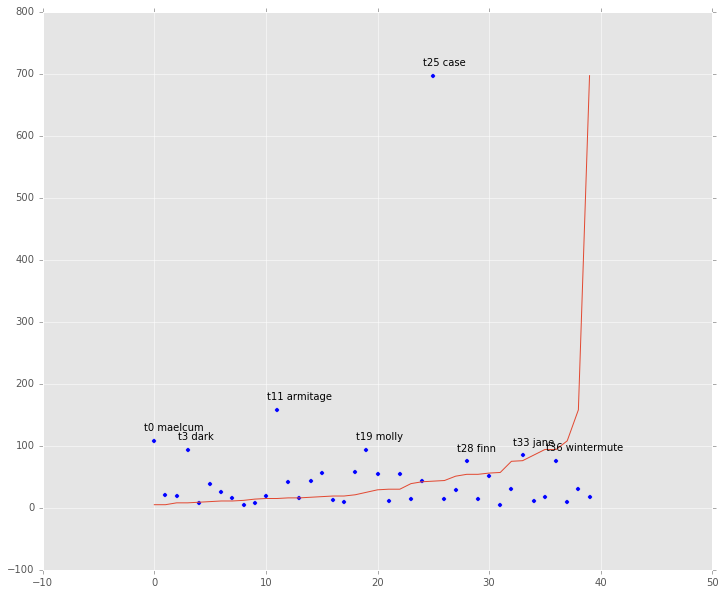

In [11]:
import sqlite3, matplotlib
import pandas as pd
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

z = 40
iterations = 500
data = []
dbfile = ''
dbfile = '/Users/rca2t/Documents/Projects/TopicModels/polo_test/projects/demo/trials/default/demo-default-z{0}-i{1}.db'.format(z,iterations)
with sqlite3.connect(dbfile) as conn:
    cur = conn.cursor()    
    for i in range(int(z)):
        sql = "SELECT word_str, max(t{0}), {0} as 'topic' FROM wordtopic".format(i)
        for r in cur.execute(sql):
            data.append(r)
            
data = sorted(data, key=lambda tup: tup[1])
df = pd.DataFrame(data, columns=['word','weight','topic']) #.sort_values('weight')
fig, (ax) = plt.subplots(figsize=(12,10))
ax.scatter(df['topic'],df['weight'])
ax.plot(df['weight'])

for d in data:
    if d[1] < 75: continue
    label = 't{1} {0}'.format(d[0],d[2])
    x = d[2] 
    y = d[1]
    ax.annotate(label,xy=(x,y),xytext=(-10,10),textcoords='offset pixels')

In [3]:
df.sort_values(['weight'], ascending=0).head(100)

,word,weight,topic
39,case,697,25
38,armitage,158,11
37,maelcum,108,0
36,molly,94,19
35,dark,94,3
34,jane,85,33
33,wintermute,76,36
32,finn,75,28
31,ice,57,18
30,riviera,56,15
